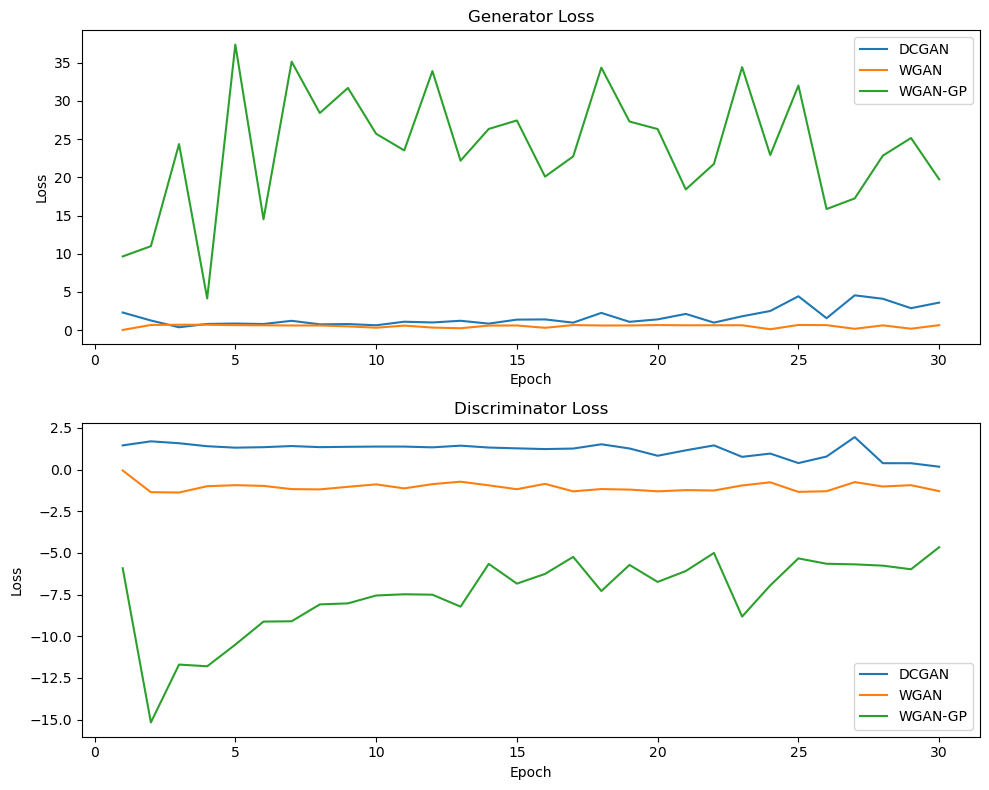

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Training data for DCGAN, WGAN, and WGAN-GP
epochs = 30

# DCGAN Losses (Discriminator and Generator Loss)
dcgan_d_loss = [1.4536, 1.6962, 1.5821, 1.4034, 1.3163, 1.3450, 1.4133, 1.3477, 1.3676, 1.3815,
                1.3812, 1.3354, 1.4364, 1.3239, 1.2756, 1.2317, 1.2628, 1.5192, 1.2679, 0.8306,
                1.1564, 1.4525, 0.7651, 0.9623, 0.3910, 0.7846, 1.9501, 0.3848, 0.3820, 0.1732]
dcgan_g_loss = [2.3024, 1.2599, 0.3700, 0.8088, 0.8578, 0.7988, 1.2170, 0.7550, 0.7918, 0.6327,
                1.0975, 1.0003, 1.2218, 0.8492, 1.3724, 1.3983, 0.9766, 2.2540, 1.0843, 1.4050,
                2.1191, 0.9818, 1.8102, 2.5031, 4.4298, 1.5573, 4.5539, 4.0998, 2.8708, 3.6010]

# WGAN Losses (Discriminator and Generator Loss)
wgan_d_loss = [-0.0545, -1.3541, -1.3747, -0.9967, -0.9352, -0.9769, -1.1703, -1.1873, -1.0321, -0.8871,
               -1.1265, -0.8723, -0.7259, -0.9433, -1.1776, -0.8547, -1.3047, -1.1674, -1.2006, -1.3034,
               -1.2312, -1.2539, -0.9511, -0.7623, -1.3373, -1.2967, -0.7509, -1.0140, -0.9345, -1.2909]
wgan_g_loss = [0.0196, 0.6734, 0.7023, 0.7016, 0.6461, 0.6288, 0.6013, 0.6055, 0.4881, 0.3114,
               0.5904, 0.3339, 0.2425, 0.5927, 0.6050, 0.3025, 0.6579, 0.6047, 0.6089, 0.6609,
               0.6296, 0.6347, 0.6339, 0.1130, 0.6708, 0.6499, 0.1680, 0.6206, 0.1827, 0.6485]

# WGAN-GP Losses (Discriminator and Generator Loss)
wgangp_d_loss = [-5.9203, -15.1710, -11.6980, -11.8004, -10.4996, -9.1196, -9.0995, -8.0879, -8.0256, -7.5539,
                 -7.4802, -7.5052, -8.2229, -5.6568, -6.8408, -6.2589, -5.2367, -7.2852, -5.7188, -6.7394,
                 -6.0859, -5.0005, -8.8174, -6.9493, -5.3270, -5.6495, -5.6849, -5.7629, -5.9808, -4.6547]
wgangp_g_loss = [9.6482, 10.9880, 24.3580, 4.1465, 37.3847, 14.5125, 35.1466, 28.4269, 31.7082, 25.7107,
                 23.5267, 33.9185, 22.1881, 26.3408, 27.4536, 20.0970, 22.7428, 34.3674, 27.3106, 26.3261,
                 18.4229, 21.7606, 34.4352, 22.9181, 32.0207, 15.8503, 17.2429, 22.8481, 25.1553, 19.7426]

# Create figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Generator Loss
axs[0].plot(range(1, epochs + 1), dcgan_g_loss, label='DCGAN')
axs[0].plot(range(1, epochs + 1), wgan_g_loss, label='WGAN')
axs[0].plot(range(1, epochs + 1), wgangp_g_loss, label='WGAN-GP')
axs[0].set_title('Generator Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot Discriminator Loss
axs[1].plot(range(1, epochs + 1), dcgan_d_loss, label='DCGAN')
axs[1].plot(range(1, epochs + 1), wgan_d_loss, label='WGAN')
axs[1].plot(range(1, epochs + 1), wgangp_d_loss, label='WGAN-GP')
axs[1].set_title('Discriminator Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [1]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from models import DCGAN, WGAN


# Load the FashionMNIST dataset
dataset = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.Compose(
        [
            transforms.Resize(64),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5]),
        ]
    ),
)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)


In [ ]:
dcgan_1 = DCGAN(
    latent_dim=100,
    num_classes=10,
    img_channels=1,
    learning_rate=0.0002,
    beta1=0.2,
    num_layers_G=4,
    num_layers_D=4,
    nonlinearity_G="ReLU",
    nonlinearity_D="LeakyReLU",
)
print(dcgan_1.netG)
print(dcgan_1.netD)
print("===============================================")


G_losses, D_losses = dcgan_1.train(
    dataloader,
    num_epochs=10,
    output_dir="./output/dcgan_1",
    checkpoint_dir="./checkpoints/dcgan_1",
)

In [3]:
wgan_1 = WGAN(
    latent_dim=100,
    num_classes=10,
    img_channels=1,
    learning_rate=0.0002,
    num_layers_G=4,
    num_layers_D=4,
    nonlinearity_G="ReLU",
    nonlinearity_D="LeakyReLU",
    norm_layer_D="none",
)
print(wgan_1.netG)
print(wgan_1.netD)
print("===============================================")


G_losses, D_losses = wgan_1.train(
    dataloader,
    num_epochs=10,
    output_dir="./output/wgan_1",
    checkpoint_dir="./checkpoints/wgan_1",
)

Generator(
  (label_emb): Embedding(10, 10)
  (main): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(110, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

KeyboardInterrupt: 

In [75]:
from models import DCGAN

In [76]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [77]:
# Load the FashionMNIST dataset
dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
]))

dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

100%|██████████| 26421880/26421880 [00:06<00:00, 4078926.75it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 312659.13it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2238688.58it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7302088.94it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [85]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from models.components import Generator, Discriminator
from models.gan import GAN


class DCGAN(GAN):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
        learning_rate=0.0002,
        beta1=0.2,
        num_layers_G=4,
        num_layers_D=4,
        nonlinearity_G="ReLU",
        nonlinearity_D="LeakyReLU",
    ):
        """
        The DCGAN class that combines the Generator and Discriminator.
        Follows the PyTorch Lightning Module structure that wraps the training loop.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        learning_rate : float
            The learning rate for the optimizer.
        beta1 : float
            The beta1 parameter for the Adam optimizer.
        """
        super().__init__(
            latent_dim=latent_dim,
            num_classes=num_classes,
            img_channels=img_channels,
        )
        # Generator and Discriminator
        self.netG = Generator(
            latent_dim=latent_dim,
            num_classes=num_classes,
            img_channels=img_channels,
            num_layers=num_layers_G,
            nonlinearity=nonlinearity_G,
        ).to(self.device)
        self.netD = Discriminator(
            num_classes=num_classes,
            img_channels=img_channels,
            num_layers=num_layers_D,
            nonlinearity=nonlinearity_D,
        ).to(self.device)

        # Training configurations
        self.learning_rate = learning_rate
        self.beta1 = beta1

    @property
    def criterion(self):
        if not hasattr(self, "_criterion"):
            self._criterion = nn.BCELoss()
        return self._criterion

    @property
    def optimizerG(self):
        if not hasattr(self, "_optimizerG"):
            self._optimizerG = optim.Adam(
                self.netG.parameters(), lr=self.learning_rate, betas=(self.beta1, 0.999)
            )
        return self._optimizerG

    @property
    def optimizerD(self):
        if not hasattr(self, "_optimizerD"):
            self._optimizerD = optim.Adam(
                self.netD.parameters(), lr=self.learning_rate, betas=(self.beta1, 0.999)
            )
        return self._optimizerD

    def training_step(
        self,
        batch: Tuple[torch.Tensor],
        batch_idx: int,
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Run a single training step on a batch of data and
        return the losses of the Generator and Discriminator.

        Parameters
        ----------
        batch : Tuple[torch.Tensor]
            A tuple containing
            - input images (batch_size, img_channels, 64, 64) and
            - labels (batch_size).
        batch_idx : int
            The index of the current batch.

        Returns
        -------
        errG : torch.Tensor
            The loss of the Generator.
        errD : torch.Tensor
            The loss of the Discriminator.
        """
        real_images, class_labels = batch
        real_images = real_images.to(self.device)
        class_labels = class_labels.to(self.device)
        batch_size = real_images.size(0)

        # Labels for real and fake data
        real_labels = torch.ones(batch_size, device=self.device)
        fake_labels = torch.zeros(batch_size, device=self.device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        self.netD.zero_grad()

        # Real images
        output_real = self.netD(real_images, class_labels).view(-1)
        print(output_real.shape)
        print(real_labels.shape)
        errD_real = self.criterion(output_real, real_labels)

        # Fake images
        noise = torch.randn(batch_size, self.latent_dim, 1, 1, device=self.device)
        fake_images = self.netG(noise, class_labels)
        output_fake = self.netD(fake_images.detach(), class_labels).view(-1)
        errD_fake = self.criterion(output_fake, fake_labels)

        # Total Discriminator loss
        errD = errD_real + errD_fake
        errD.backward()
        self.optimizerD.step()

        # ---------------------
        #  Train Generator
        # ---------------------
        self.netG.zero_grad()
        output_fake = self.netD(fake_images, class_labels).view(-1)
        errG = self.criterion(output_fake, real_labels)
        errG.backward()
        self.optimizerG.step()

        return errG, errD


In [86]:
dcgan_1 = DCGAN(
    latent_dim=100,
    num_classes=10,
    img_channels=1,
    learning_rate=0.0002,
    beta1=0.2,
    num_layers_G=4,
    num_layers_D=4,
    nonlinearity_G="ReLU",
    nonlinearity_D="LeakyReLU",
)
print(dcgan_1.netG)
print(dcgan_1.netD)


Generator(
  (label_emb): Embedding(10, 10)
  (main): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(110, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [87]:
dcgan_1.train(dataloader, num_epochs=10, output_dir="./output/dcgan_1")

Training the model on cpu
torch.Size([256])
torch.Size([256])


KeyboardInterrupt: 

In [14]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision


### 4-layer G and D

In [21]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision


# Function to select nonlinearity
def get_nonlinearity(name):
    if name == "ReLU":
        return nn.ReLU(True)
    elif name == "LeakyReLU":
        return nn.LeakyReLU(0.2, inplace=True)
    elif name == "softplus":
        return lambda x: (torch.nn.functional.softplus(2 * x + 2) / 2) - 1
    elif name == "tanh":
        return nn.Tanh()
    else:
        raise ValueError("Invalid nonlinearity selection.")


class Generator(nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
        num_layers=4,
        nonlinearity="ReLU",
    ):
        """
        The Generator class for DCGAN.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        num_layers : int
            The number of layers in the Generator, not including the output layer.
        nonlinearity : str
            The nonlinearity to use in the Generator.
        """
        super().__init__()
        self.nonlinearity = nonlinearity
        self.input_dim = latent_dim + num_classes

        # The embedding layer for the class labels
        self.label_emb = nn.Embedding(num_classes, num_classes)

        # Get the main body of the Generator
        if num_layers == 4:
            main = self._get_4_layer()
        elif num_layers == 8:
            main = self._get_8_layer()
        else:
            raise ValueError("Invalid number of layers for Generator.")

        # Output layer: produces 1-channel 64x64 image in [-1, 1]
        main.append(
            nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),
        )
        main.append(nn.Tanh())
        self.main = nn.Sequential(*main)

    def _get_4_layer(self):
        return [
            # Layer 1: (1x1) -> (4x4)
            nn.ConvTranspose2d(self.input_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            get_nonlinearity(self.nonlinearity),
            # Layer 2: (4x4) -> (8x8)
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            get_nonlinearity(self.nonlinearity),
            # Layer 3: (8x8) -> (16x16)
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            get_nonlinearity(self.nonlinearity),
            # Layer 4: (16x16) -> (32x32)
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            get_nonlinearity(self.nonlinearity),
        ]

    def _get_8_layer(self):
        return [
            # Layer 1: (1x1) -> (4x4)
            nn.ConvTranspose2d(self.input_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 2: (4x4) -> (4x4)
            nn.ConvTranspose2d(512, 512, 3, 1, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 3: (4x4) -> (8x8)
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 4: (8x8) -> (8x8)
            nn.ConvTranspose2d(256, 256, 3, 1, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 5: (8x8) -> (16x16)
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 6: (16x16) -> (16x16)
            nn.ConvTranspose2d(128, 128, 3, 1, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 7: (16x16) -> (32x32)
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Layer 8: (32x32) -> (32x32)
            nn.ConvTranspose2d(64, 64, 3, 1, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
        ]

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        # Concatenate noise vector z and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        z = torch.cat(
            [noise, label_embedding], dim=1
        )  # (batch_size, latent_dim + num_classes, 1, 1)
        return self.main(z)


In [26]:
sample_noise = torch.randn(2, 100, 1, 1)
sample_labels = torch.randint(0, 10, (2,))
sample_images = torch.randn(2, 1, 64, 64)

gen = Generator(num_layers=8, nonlinearity="LeakyReLU")

gen(sample_noise, sample_labels).shape


torch.Size([2, 1, 64, 64])

In [15]:
class Generator(nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
    ):
        """
        The Generator class for DCGAN.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        """
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Input is the latent vector z + class label, going into a transposed conv layer
            nn.ConvTranspose2d(latent_dim + num_classes, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 2
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 3
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 4
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Output layer: produces 1-channel 64x64 image
            nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),
            nn.Tanh(),  # Output range should be [-1, 1]
        )

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        # Concatenate noise vector z and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        z = torch.cat(
            [noise, label_embedding], dim=1
        )  # (batch_size, latent_dim + num_classes, 1, 1)
        return self.main(z)


class Discriminator(nn.Module):
    def __init__(
        self,
        num_classes=10,
        img_channels=1,
    ):
        """
        The Discriminator class for DCGAN.

        Parameters
        ----------
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        """
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Input is the image + class label, going into a conv layer
            nn.Conv2d(img_channels + num_classes, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 2
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 3
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 4
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            # Output layer
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),  # Output probability between 0 and 1
        )

    def forward(self, img, labels) -> torch.Tensor:
        """
        Forward pass of the Discriminator to classify real/fake images.

        Parameters
        ----------
        img : torch.Tensor (batch_size, img_channels, 64, 64)
            The input images to be classified.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, 1, 1, 1)
            The probability of the input images being real.
        """
        # Concatenate image and class label embedding
        label_embedding = self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        label_embedding = label_embedding.expand(-1, -1, img.size(2), img.size(3))
        img = torch.cat([img, label_embedding], dim=1)
        return self.main(img)

In [16]:
sample_noise = torch.randn(2, 100, 1, 1)
sample_labels = torch.randint(0, 10, (2,))
sample_images = torch.randn(2, 1, 64, 64)

gen = Generator()
disc = Discriminator()

gen(sample_noise, sample_labels).shape, disc(sample_images, sample_labels).shape


(torch.Size([2, 1, 64, 64]), torch.Size([2, 1, 1, 1]))

### 8-layer G and D

In [17]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
    ):
        """
        The Generator class for DCGAN with 8 layers.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the output images.
        """
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Layer 1
            nn.ConvTranspose2d(latent_dim + num_classes, 512, 4, 1, 0, bias=False),  # (1x1) -> (4x4)
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 2
            nn.ConvTranspose2d(512, 512, 3, 1, 1, bias=False),  # (4x4) -> (4x4)
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 3
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),  # (4x4) -> (8x8)
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 4
            nn.ConvTranspose2d(256, 256, 3, 1, 1, bias=False),  # (8x8) -> (8x8)
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 5
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # (8x8) -> (16x16)
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 6
            nn.ConvTranspose2d(128, 128, 3, 1, 1, bias=False),  # (16x16) -> (16x16)
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 7
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),   # (16x16) -> (32x32)
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Layer 8
            nn.ConvTranspose2d(64, 64, 3, 1, 1, bias=False),    # (32x32) -> (32x32)
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Output Layer
            nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),  # (32x32) -> (64x64)
            nn.Tanh(),  # Output range should be [-1, 1]
        )

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        # Concatenate noise vector z and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        z = torch.cat(
            [noise, label_embedding], dim=1
        )  # (batch_size, latent_dim + num_classes, 1, 1)
        return self.main(z)


class Discriminator(nn.Module):
    def __init__(
        self,
        num_classes=10,
        img_channels=1,
    ):
        """
        The Discriminator class for DCGAN with 8 layers.

        Parameters
        ----------
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        """
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Layer 1
            nn.Conv2d(img_channels + num_classes, 64, 4, 2, 1, bias=False),  # (64x64) -> (32x32)
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 2
            nn.Conv2d(64, 64, 3, 1, 1, bias=False),  # (32x32) -> (32x32)
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 3
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),  # (32x32) -> (16x16)
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 4
            nn.Conv2d(128, 128, 3, 1, 1, bias=False),  # (16x16) -> (16x16)
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 5
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),  # (16x16) -> (8x8)
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 6
            nn.Conv2d(256, 256, 3, 1, 1, bias=False),  # (8x8) -> (8x8)
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 7
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),  # (8x8) -> (4x4)
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 8
            nn.Conv2d(512, 512, 3, 1, 1, bias=False),  # (4x4) -> (4x4)
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            # Output Layer
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),  # (4x4) -> (1x1)
            nn.Sigmoid(),  # Output probability between 0 and 1
        )

    def forward(self, img, labels) -> torch.Tensor:
        """
        Forward pass of the Discriminator to classify real/fake images.

        Parameters
        ----------
        img : torch.Tensor (batch_size, img_channels, 64, 64)
            The input images to be classified.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, 1, 1, 1)
            The probability of the input images being real.
        """
        # Concatenate image and class label embedding
        label_embedding = self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        label_embedding = label_embedding.expand(-1, -1, img.size(2), img.size(3))
        img = torch.cat([img, label_embedding], dim=1)
        return self.main(img)


In [18]:
sample_noise = torch.randn(2, 100, 1, 1)
sample_labels = torch.randint(0, 10, (2,))
sample_images = torch.randn(2, 1, 64, 64)

gen = Generator()
disc = Discriminator()

gen(sample_noise, sample_labels).shape, disc(sample_images, sample_labels).shape


(torch.Size([2, 1, 64, 64]), torch.Size([2, 1, 1, 1]))

In [70]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision


# Function to select nonlinearity
def get_nonlinearity(name):
    if name == "ReLU":
        return nn.ReLU(True)
    elif name == "LeakyReLU":
        return nn.LeakyReLU(0.2, inplace=True)
    elif name == "softplus":
        return lambda x: (torch.nn.functional.softplus(2 * x + 2) / 2) - 1
    elif name == "tanh":
        return nn.Tanh()
    else:
        raise ValueError("Invalid nonlinearity selection.")


def get_norm_layer(norm_layer, num_features, img_shape):
    if norm_layer == "bn":
        return nn.BatchNorm2d(num_features)
    elif norm_layer == "ln":
        return nn.LayerNorm([num_features, img_shape[0], img_shape[1]])
    elif norm_layer == "none":
        return nn.Identity()
    else:
        raise ValueError("Invalid normalization layer selection.")


class Generator(nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
        num_layers=4,
        nonlinearity="ReLU",
    ):
        """
        The Generator class for DCGAN, WGAN, and WGAN-GP.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        num_layers : int
            The number of layers in the Generator, not including the output layer.
        nonlinearity : str
            The nonlinearity to use in the Generator.
        """
        super().__init__()
        self.nonlinearity = nonlinearity
        self.input_dim = latent_dim + num_classes

        # The embedding layer for the class labels
        self.label_emb = nn.Embedding(num_classes, num_classes)

        # Get the main body of the Generator
        if num_layers == 4:
            main = self._get_4_layer()
        elif num_layers == 8:
            main = self._get_8_layer()
        else:
            raise ValueError("Invalid number of layers for Generator.")

        # Output layer: produces 1-channel 64x64 image in [-1, 1]
        main.add_module(
            "output",
            nn.Sequential(
                nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),
                nn.Tanh(),
            ),
        )

        self.main = nn.Sequential(*main)

    def _get_4_layer(self) -> nn.Sequential:
        main = nn.Sequential()

        # Layer 1: (1x1) -> (4x4)
        main.add_module(
            "block1",
            nn.Sequential(
                nn.ConvTranspose2d(self.input_dim, 512, 4, 1, 0, bias=False),
                nn.BatchNorm2d(512),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 2: (4x4) -> (8x8)
        main.add_module(
            "block2",
            nn.Sequential(
                nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                nn.BatchNorm2d(256),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 3: (8x8) -> (16x16)
        main.add_module(
            "block3",
            nn.Sequential(
                nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                nn.BatchNorm2d(128),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 4: (16x16) -> (32x32)
        main.add_module(
            "block4",
            nn.Sequential(
                nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
                nn.BatchNorm2d(64),
                get_nonlinearity(self.nonlinearity),
            ),
        )

        return main

    def _get_8_layer(self) -> nn.Sequential:
        main = nn.Sequential()

        # Layer 1: (1x1) -> (4x4)
        main.add_module(
            "block1",
            nn.Sequential(
                nn.ConvTranspose2d(self.input_dim, 512, 4, 1, 0, bias=False),
                nn.BatchNorm2d(512),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 2: (4x4) -> (4x4)
        main.add_module(
            "block2",
            nn.Sequential(
                nn.ConvTranspose2d(512, 512, 3, 1, 1, bias=False),
                nn.BatchNorm2d(512),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 3: (4x4) -> (8x8)
        main.add_module(
            "block3",
            nn.Sequential(
                nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
                nn.BatchNorm2d(256),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 4: (8x8) -> (8x8)
        main.add_module(
            "block4",
            nn.Sequential(
                nn.ConvTranspose2d(256, 256, 3, 1, 1, bias=False),
                nn.BatchNorm2d(256),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 5: (8x8) -> (16x16)
        main.add_module(
            "block5",
            nn.Sequential(
                nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
                nn.BatchNorm2d(128),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 6: (16x16) -> (16x16)
        main.add_module(
            "block6",
            nn.Sequential(
                nn.ConvTranspose2d(128, 128, 3, 1, 1, bias=False),
                nn.BatchNorm2d(128),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 7: (16x16) -> (32x32)
        main.add_module(
            "block7",
            nn.Sequential(
                nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
                nn.BatchNorm2d(64),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 8: (32x32) -> (32x32)
        main.add_module(
            "block8",
            nn.Sequential(
                nn.ConvTranspose2d(64, 64, 3, 1, 1, bias=False),
                nn.BatchNorm2d(64),
                get_nonlinearity(self.nonlinearity),
            ),
        )

        return main

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        # Concatenate noise vector z and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        z = torch.cat(
            [noise, label_embedding], dim=1
        )  # (batch_size, latent_dim + num_classes, 1, 1)
        return self.main(z)


class Discriminator(nn.Module):
    def __init__(
        self,
        num_classes=10,
        img_channels=1,
        num_layers=4,
        nonlinearity="LeakyReLU",
    ):
        """
        The Discriminator class for DCGAN.

        Parameters
        ----------
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        num_layers : int
            The number of layers in the Discriminator, not including the output layer.
        nonlinearity : str
            The nonlinearity to use in the Discriminator.
        """
        super().__init__()
        self.input_dim = img_channels + num_classes
        self.nonlinearity = nonlinearity

        # The embedding layer for the class labels
        self.label_emb = nn.Embedding(num_classes, num_classes)

        # Get the main body of the Discriminator
        if num_layers == 4:
            main = self._get_4_layer()
        elif num_layers == 8:
            main = self._get_8_layer()

        # Output layer: produces probability of input image being real
        main.append(
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
        )
        main.append(nn.Sigmoid())
        self.main = nn.Sequential(*main)

    def _get_4_layer(self) -> nn.Sequential:
        main = nn.Sequential()

        # Layer 1: (64x64) -> (32x32)
        main.add_module(
            "block1",
            nn.Sequential(
                nn.Conv2d(self.input_dim, 64, 4, 2, 1, bias=False),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 2: (32x32) -> (16x16)
        main.add_module(
            "block2",
            nn.Sequential(
                nn.Conv2d(64, 128, 4, 2, 1, bias=False),
                nn.BatchNorm2d(128),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 3: (16x16) -> (8x8)
        main.add_module(
            "block3",
            nn.Sequential(
                nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                nn.BatchNorm2d(256),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 4: (8x8) -> (4x4)
        main.add_module(
            "block4",
            nn.Sequential(
                nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                nn.BatchNorm2d(512),
                get_nonlinearity(self.nonlinearity),
            ),
        )

        return main

    def _get_8_layer(self) -> nn.Sequential:
        main = nn.Sequential()

        # Layer 1: (64x64) -> (32x32)
        main.add_module(
            "block1",
            nn.Sequential(
                nn.Conv2d(self.input_dim, 64, 4, 2, 1, bias=False),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 2: (32x32) -> (32x32)
        main.add_module(
            "block2",
            nn.Sequential(
                nn.Conv2d(64, 64, 3, 1, 1, bias=False),
                nn.BatchNorm2d(64),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 3: (32x32) -> (16x16)
        main.add_module(
            "block3",
            nn.Sequential(
                nn.Conv2d(64, 128, 4, 2, 1, bias=False),
                nn.BatchNorm2d(128),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 4: (16x16) -> (16x16)
        main.add_module(
            "block4",
            nn.Sequential(
                nn.Conv2d(128, 128, 3, 1, 1, bias=False),
                nn.BatchNorm2d(128),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 5: (16x16) -> (8x8)
        main.add_module(
            "block5",
            nn.Sequential(
                nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                nn.BatchNorm2d(256),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 6: (8x8) -> (8x8)
        main.add_module(
            "block6",
            nn.Sequential(
                nn.Conv2d(256, 256, 3, 1, 1, bias=False),
                nn.BatchNorm2d(256),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 7: (8x8) -> (4x4)
        main.add_module(
            "block7",
            nn.Sequential(
                nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                nn.BatchNorm2d(512),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 8: (4x4) -> (4x4)
        main.add_module(
            "block8",
            nn.Sequential(
                nn.Conv2d(512, 512, 3, 1, 1, bias=False),
                nn.BatchNorm2d(512),
                get_nonlinearity(self.nonlinearity),
            ),
        )

        return main

    def forward(self, img, labels) -> torch.Tensor:
        """
        Forward pass of the Discriminator to classify real/fake images.

        Parameters
        ----------
        img : torch.Tensor (batch_size, img_channels, 64, 64)
            The input images to be classified.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, 1, 1, 1)
            The probability of the input images being real.
        """
        # Concatenate image and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        label_embedding = label_embedding.expand(
            -1, -1, img.size(2), img.size(3)
        )  # (batch_size, num_classes, 64, 64)
        img = torch.cat(
            [img, label_embedding], dim=1
        )  # (batch_size, img_channels + num_classes, 64, 64)
        return self.main(img)


class Critic(nn.Module):
    def __init__(
        self,
        num_classes=10,
        img_channels=1,
        num_layers=4,
        nonlinearity="LeakyReLU",
        norm_layer="none",
    ):
        """
        The Critic class for WGAN and WGAN-GP.

        Parameters
        ----------
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        num_layers : int
            The number of layers in the Critic, not including the output layer.
        nonlinearity : str
            The nonlinearity to use in the Critic.
        norm_layer : str
            The normalization layer to use in the Critic.
            "bn" for BatchNorm, "ln" for LayerNorm, and "none" for no normalization.
            For WGAN, use "none". For WGAN-GP, use "ln".
        """
        super().__init__()
        self.input_dim = img_channels + num_classes
        self.nonlinearity = nonlinearity
        self.norm_layer = norm_layer

        # The embedding layer for the class labels
        self.label_emb = nn.Embedding(num_classes, num_classes)

        # Get the main body of the Discriminator
        if num_layers == 4:
            main = self._get_4_layer()
        elif num_layers == 8:
            main = self._get_8_layer()

        # Output layer: produces probability of input image being real
        main.append(
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
        )
        main.append(nn.Sigmoid())
        self.main = nn.Sequential(*main)

    def _get_4_layer(self) -> nn.Sequential:
        main = nn.Sequential()

        # Layer 1: (64x64) -> (32x32)
        main.add_module(
            "block1",
            nn.Sequential(
                nn.Conv2d(self.input_dim, 64, 4, 2, 1, bias=False),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 2: (32x32) -> (16x16)
        main.add_module(
            "block2",
            nn.Sequential(
                nn.Conv2d(64, 128, 4, 2, 1, bias=False),
                get_norm_layer(self.norm_layer, 128, (16, 16)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 3: (16x16) -> (8x8)
        main.add_module(
            "block3",
            nn.Sequential(
                nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                get_norm_layer(self.norm_layer, 256, (8, 8)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 4: (8x8) -> (4x4)
        main.add_module(
            "block4",
            nn.Sequential(
                nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                get_norm_layer(self.norm_layer, 512, (4, 4)),
                get_nonlinearity(self.nonlinearity),
            ),
        )

        return main

    def _get_8_layer(self) -> nn.Sequential:
        main = nn.Sequential()

        # Layer 1: (64x64) -> (32x32)
        main.add_module(
            "block1",
            nn.Sequential(
                nn.Conv2d(self.input_dim, 64, 4, 2, 1, bias=False),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 2: (32x32) -> (32x32)
        main.add_module(
            "block2",
            nn.Sequential(
                nn.Conv2d(64, 64, 3, 1, 1, bias=False),
                get_norm_layer(self.norm_layer, 64, (32, 32)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 3: (32x32) -> (16x16)
        main.add_module(
            "block3",
            nn.Sequential(
                nn.Conv2d(64, 128, 4, 2, 1, bias=False),
                get_norm_layer(self.norm_layer, 128, (16, 16)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 4: (16x16) -> (16x16)
        main.add_module(
            "block4",
            nn.Sequential(
                nn.Conv2d(128, 128, 3, 1, 1, bias=False),
                get_norm_layer(self.norm_layer, 128, (16, 16)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 5: (16x16) -> (8x8)
        main.add_module(
            "block5",
            nn.Sequential(
                nn.Conv2d(128, 256, 4, 2, 1, bias=False),
                get_norm_layer(self.norm_layer, 256, (8, 8)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 6: (8x8) -> (8x8)
        main.add_module(
            "block6",
            nn.Sequential(
                nn.Conv2d(256, 256, 3, 1, 1, bias=False),
                get_norm_layer(self.norm_layer, 256, (8, 8)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 7: (8x8) -> (4x4)
        main.add_module(
            "block7",
            nn.Sequential(
                nn.Conv2d(256, 512, 4, 2, 1, bias=False),
                get_norm_layer(self.norm_layer, 512, (4, 4)),
                get_nonlinearity(self.nonlinearity),
            ),
        )
        # Layer 8: (4x4) -> (4x4)
        main.add_module(
            "block8",
            nn.Sequential(
                nn.Conv2d(512, 512, 3, 1, 1, bias=False),
                get_norm_layer(self.norm_layer, 512, (4, 4)),
                get_nonlinearity(self.nonlinearity),
            ),
        )

        return main

    def forward(self, img, labels) -> torch.Tensor:
        """
        Forward pass of the Discriminator to classify real/fake images.

        Parameters
        ----------
        img : torch.Tensor (batch_size, img_channels, 64, 64)
            The input images to be classified.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, 1, 1, 1)
            The probability of the input images being real.
        """
        # Concatenate image and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        label_embedding = label_embedding.expand(
            -1, -1, img.size(2), img.size(3)
        )  # (batch_size, num_classes, 64, 64)
        img = torch.cat(
            [img, label_embedding], dim=1
        )  # (batch_size, img_channels + num_classes, 64, 64)
        return self.main(img)


In [74]:
sample_noise = torch.randn(2, 100, 1, 1)
sample_labels = torch.randint(0, 10, (2,))
sample_images = torch.randn(2, 1, 64, 64)

gen = Generator(num_layers=4, nonlinearity="LeakyReLU")
disc = Discriminator(num_layers=4, nonlinearity="LeakyReLU")
crit = Critic(num_layers=8, nonlinearity="LeakyReLU", norm_layer="bn")

# Should output: (2, 1, 64, 64), (2, 1, 1, 1), (2, 1, 1, 1)
gen(sample_noise, sample_labels).shape, disc(sample_images, sample_labels).shape, crit(sample_images, sample_labels).shape


(torch.Size([2, 1, 64, 64]),
 torch.Size([2, 1, 1, 1]),
 torch.Size([2, 1, 1, 1]))

In [69]:
print(crit)

Critic(
  (label_emb): Embedding(10, 10)
  (main): Sequential(
    (0): Sequential(
      (0): Conv2d(11, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): Identity()
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): Identity()
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): Identity()
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (4): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (5): Sigmoid()
  )
)


In [8]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision


# Function to select nonlinearity
def get_nonlinearity(name):
    if name == "ReLU":
        return nn.ReLU(True)
    elif name == "LeakyReLU":
        return nn.LeakyReLU(0.2, inplace=True)
    elif name == "softplus":
        return lambda x: (torch.nn.functional.softplus(2 * x + 2) / 2) - 1
    elif name == "tanh":
        return nn.Tanh()
    else:
        raise ValueError("Invalid nonlinearity selection.")


class Generator(nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
        nonlinearity="ReLU",
    ):
        """
        The Generator class for DCGAN.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        nonlinearity : str
            The nonlinearity to use in the Generator.
        """
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Input is the latent vector z + class label, going into a transposed conv layer
            nn.ConvTranspose2d(latent_dim + num_classes, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            get_nonlinearity(nonlinearity),
            # Layer 2
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            get_nonlinearity(nonlinearity),
            # Layer 3
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            get_nonlinearity(nonlinearity),
            # Layer 4
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            get_nonlinearity(nonlinearity),
            # Output layer: produces 1-channel 64x64 image
            nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),
            nn.Tanh(),  # Output range should be [-1, 1]
        )

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        # Concatenate noise vector z and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        z = torch.cat(
            [noise, label_embedding], dim=1
        )  # (batch_size, latent_dim + num_classes, 1, 1)
        return self.main(z)


In [11]:
generator = Generator()

sample_batch_image = torch.randn(1, 100, 1, 1)
sample_batch_label = torch.randint(0, 10, (1,))
output = generator(sample_batch_image, sample_batch_label)
print(output.shape)

torch.Size([1, 1, 64, 64])


In [12]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
    ):
        """
        The Generator class for DCGAN with 8 layers.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the output images.
        """
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Layer 1
            nn.ConvTranspose2d(latent_dim + num_classes, 512, 4, 1, 0, bias=False),  # (1x1) -> (4x4)
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 2
            nn.ConvTranspose2d(512, 512, 3, 1, 1, bias=False),  # (4x4) -> (4x4)
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 3
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),  # (4x4) -> (8x8)
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 4
            nn.ConvTranspose2d(256, 256, 3, 1, 1, bias=False),  # (8x8) -> (8x8)
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 5
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # (8x8) -> (16x16)
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 6
            nn.ConvTranspose2d(128, 128, 3, 1, 1, bias=False),  # (16x16) -> (16x16)
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 7
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),   # (16x16) -> (32x32)
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Layer 8
            nn.ConvTranspose2d(64, 64, 3, 1, 1, bias=False),    # (32x32) -> (32x32)
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Output Layer
            nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),  # (32x32) -> (64x64)
            nn.Tanh(),  # Output range should be [-1, 1]
        )

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        # Concatenate noise vector z and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        z = torch.cat(
            [noise, label_embedding], dim=1
        )  # (batch_size, latent_dim + num_classes, 1, 1)
        return self.main(z)

In [13]:
generator = Generator()

sample_batch_image = torch.randn(1, 100, 1, 1)
sample_batch_label = torch.randint(0, 10, (1,))
output = generator(sample_batch_image, sample_batch_label)
print(output.shape)

torch.Size([1, 1, 64, 64])


In [3]:
num_layers = 4
base_filter_count = 64
generator = build_generator(num_layers, base_filter_count)
print(generator)


Sequential(
  (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace=True)
  (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (13): Tanh()
)


In [6]:
num_layers = 8
base_filter_count = 64
generator = build_generator(num_layers, base_filter_count)
print(generator)


Sequential(
  (0): ConvTranspose2d(100, 8192, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): BatchNorm2d(8192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): ConvTranspose2d(8192, 4096, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (4): BatchNorm2d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): ConvTranspose2d(4096, 2048, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (7): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): ConvTranspose2d(2048, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (10): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace=True)
  (12): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, aff

In [7]:
import torch

sample_batch = torch.randn(1, 100, 1, 1)
output = generator(sample_batch)
print(output.shape)

torch.Size([1, 1, 1024, 1024])


In [ ]:
from typing import Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision


class Generator(nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
    ):
        """
        The Generator class for DCGAN.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        """
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Input is the latent vector z + class label, going into a transposed conv layer
            nn.ConvTranspose2d(latent_dim + num_classes, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            # Layer 2
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            # Layer 3
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            # Layer 4
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # Output layer: produces 1-channel 64x64 image
            nn.ConvTranspose2d(64, img_channels, 4, 2, 1, bias=False),
            nn.Tanh(),  # Output range should be [-1, 1]
        )

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        # Concatenate noise vector z and class label embedding
        label_embedding = (
            self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        )  # (batch_size, num_classes, 1, 1)
        z = torch.cat(
            [noise, label_embedding], dim=1
        )  # (batch_size, latent_dim + num_classes, 1, 1)
        return self.main(z)


class Discriminator(nn.Module):
    def __init__(
        self,
        num_classes=10,
        img_channels=1,
    ):
        """
        The Discriminator class for DCGAN.

        Parameters
        ----------
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        """
        super(Discriminator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)

        self.main = nn.Sequential(
            # Input is the image + class label, going into a conv layer
            nn.Conv2d(img_channels + num_classes, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 2
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 3
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            # Layer 4
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            # Output layer
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid(),  # Output probability between 0 and 1
        )

    def forward(self, img, labels) -> torch.Tensor:
        """
        Forward pass of the Discriminator to classify real/fake images.

        Parameters
        ----------
        img : torch.Tensor (batch_size, img_channels, 64, 64)
            The input images to be classified.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, 1, 1, 1)
            The probability of the input images being real.
        """
        # Concatenate image and class label embedding
        label_embedding = self.label_emb(labels).unsqueeze(2).unsqueeze(3)
        label_embedding = label_embedding.expand(-1, -1, img.size(2), img.size(3))
        img = torch.cat([img, label_embedding], dim=1)
        return self.main(img)


class DCGAN:
    def __init__(
        self,
        latent_dim=100,
        num_classes=10,
        img_channels=1,
        learning_rate=0.0002,
        beta1=0.2,
    ):
        """
        The DCGAN class that combines the Generator and Discriminator.
        Follows the PyTorch Lightning Module structure that wraps the training loop.

        Parameters
        ----------
        latent_dim : int
            The dimension of the latent random noise vector.
        num_classes : int
            The number of classes in the dataset, used for label supervision.
        img_channels : int
            The number of channels in the input images.
        learning_rate : float
            The learning rate for the optimizer.
        beta1 : float
            The beta1 parameter for the Adam optimizer.
        """
        super(DCGAN, self).__init__()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Configuration for the model
        self.latent_dim = latent_dim
        self.num_classes = num_classes
        self.img_channels = img_channels

        # Generator and Discriminator
        self.netG = Generator(self.latent_dim, self.num_classes, self.img_channels).to(
            self.device
        )
        self.netD = Discriminator(self.num_classes, self.img_channels).to(self.device)

        # Training configurations
        self.learning_rate = learning_rate
        self.beta1 = beta1

    @property
    def criterion(self):
        if not hasattr(self, "_criterion"):
            self._criterion = nn.BCELoss()
        return self._criterion

    @property
    def optimizerG(self):
        if not hasattr(self, "_optimizerG"):
            self._optimizerG = optim.Adam(
                self.netG.parameters(), lr=self.learning_rate, betas=(self.beta1, 0.999)
            )
        return self._optimizerG

    @property
    def optimizerD(self):
        if not hasattr(self, "_optimizerD"):
            self._optimizerD = optim.Adam(
                self.netD.parameters(), lr=self.learning_rate, betas=(self.beta1, 0.999)
            )
        return self._optimizerD

    def forward(self, noise: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the Generator to generate fake images.

        Parameters
        ----------
        noise : torch.Tensor (batch_size, latent_dim, 1, 1)
            The random noise vector sampled from a normal distribution.
        labels : torch.Tensor (batch_size)
            The class labels for the images.

        Returns
        -------
        torch.Tensor (batch_size, img_channels, 64, 64)
            The generated fake images.
        """
        return self.netG(noise, labels)

    def training_step(
        self,
        batch: Tuple[torch.Tensor],
        batch_idx: int,
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Run a single training step on a batch of data and
        return the losses of the Generator and Discriminator.

        Parameters
        ----------
        batch : Tuple[torch.Tensor]
            A tuple containing
            - input images (batch_size, img_channels, 64, 64) and
            - labels (batch_size).
        batch_idx : int
            The index of the current batch.

        Returns
        -------
        errG : torch.Tensor
            The loss of the Generator.
        errD : torch.Tensor
            The loss of the Discriminator.
        """
        real_images, real_labels = batch
        real_images = real_images.to(self.device)
        real_labels = real_labels.to(self.device)
        batch_size = real_images.size(0)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        self.netD.zero_grad()

        # Train on real images
        label = torch.full((batch_size,), 1.0, dtype=torch.float).to(
            self.device
        )  # All ones label for real images
        output = self.netD(real_images, real_labels).view(-1)
        errD_real = self.criterion(output, label)
        errD_real.backward()

        # Train on fake images
        noise = torch.randn(batch_size, self.latent_dim, 1, 1).to(self.device)
        fake_labels = torch.randint(0, self.num_classes, (batch_size,)).to(self.device)
        fake_images = self.netG(noise, fake_labels)
        label.fill_(0.0)  # All zeros label for fake images
        output = self.netD(fake_images.detach(), fake_labels).view(-1)
        errD_fake = self.criterion(output, label)
        errD_fake.backward()

        errD = errD_real + errD_fake
        self.optimizerD.step()

        ## Train Generator ##
        self.netG.zero_grad()
        label.fill_(1.0)  # The generator wants to trick the discriminator

        output = self.netD(fake_images, fake_labels).view(-1)
        errG = self.criterion(output, label)
        errG.backward()
        self.optimizerG.step()

        return errG, errD

    def configure_optimizers(self):
        return [self.optimizerG, self.optimizerD], []

    def generate_images_by_label(self, num_images: int, label: int) -> torch.Tensor:
        """
        Generate fake images in the format of torchvision grid
        given a class label.

        Parameters
        ----------
        num_images : int
            The number of images to generate.
        label: int
            The class label for the images.

        Returns
        -------
        grid : torch.Tensor (3, H, W)
            The grid of fake images.
        """
        noise = torch.randn(num_images, self.latent_dim, 1, 1).to(self.device)
        labels = torch.full((num_images,), label, dtype=torch.long).to(self.device)

        with torch.no_grad():
            fake_images = self.forward(noise, labels).detach().cpu()

        grid = torchvision.utils.make_grid(fake_images, nrow=10, normalize=True)
        return grid
